In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:

# Load the dataset
file_path = r"supermarket_sales - Sheet1.csv"
df = pd.read_csv(file_path, encoding="iso-8859-1")

# Display the first few rows of the dataset to understand its structure
df.head()





,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Group by 'Invoice ID' and filter out groups with a count greater than 1
duplicate_invoices = df.groupby('Invoice ID').filter(lambda x: len(x) > 1)

# Count the number of rows in the filtered DataFrame
count = len(duplicate_invoices)
count

0

In [4]:
duplicate_invoices

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [5]:
df=df.drop(columns=["Invoice ID","Unit price","Tax 5%","gross margin percentage"])


In [6]:
df.head()

,Branch,City,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [9]:
df['Branch City'] = df['Branch'] + " " + df['City']
df['Branch City'] = df['Branch City'].astype('category')
df['Branch City'] = df['Branch City'].cat.codes

In [11]:
df=df.drop(columns=['Branch','City'])
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,Member,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,0
1,Normal,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,2
2,Normal,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,0
3,Member,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,0
4,Normal,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Normal,Male,Health and beauty,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,2
996,Normal,Female,Home and lifestyle,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4,1
997,Member,Male,Food and beverages,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,0
998,Normal,Male,Home and lifestyle,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,0


In [16]:
df['Gender']= df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,Member,0,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,0
1,Normal,0,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,2
2,Normal,1,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,0
3,Member,1,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,0
4,Normal,1,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Normal,1,Health and beauty,1,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,2
996,Normal,0,Home and lifestyle,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,48.6900,4.4,1
997,Member,1,Food and beverages,1,33.4320,2/9/2019,13:22,Cash,31.84,1.5920,7.7,0
998,Normal,1,Home and lifestyle,1,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,0


In [18]:

df['Customer type']= df['Customer type'].astype('category')
df['Customer type'] = df['Customer type'].cat.codes
df['Payment']= df['Payment'].astype('category')
df['Payment'] = df['Payment'].cat.codes
df

,Customer type,Gender,Product line,Quantity,Total,Date,Time,Payment,cogs,gross income,Rating,Branch City
0,0,0,Health and beauty,7,548.9715,1/5/2019,13:08,2,522.83,26.1415,9.1,0
1,1,0,Electronic accessories,5,80.2200,3/8/2019,10:29,0,76.40,3.8200,9.6,2
2,1,1,Home and lifestyle,7,340.5255,3/3/2019,13:23,1,324.31,16.2155,7.4,0
3,0,1,Health and beauty,8,489.0480,1/27/2019,20:33,2,465.76,23.2880,8.4,0
4,1,1,Sports and travel,7,634.3785,2/8/2019,10:37,2,604.17,30.2085,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,Health and beauty,1,42.3675,1/29/2019,13:46,2,40.35,2.0175,6.2,2
996,1,0,Home and lifestyle,10,1022.4900,3/2/2019,17:16,2,973.80,48.6900,4.4,1
997,0,1,Food and beverages,1,33.4320,2/9/2019,13:22,0,31.84,1.5920,7.7,0
998,1,1,Home and lifestyle,1,69.1110,2/22/2019,15:33,0,65.82,3.2910,4.1,0


In [ ]:
df.to_csv('ReviseSupermarket_sales - Sheet1.csv', index=False)

In [ ]:
noise_list = ["is", "a", "this", "..."]

def _remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text


In [ ]:
# Lower Case
amazon_df['review_content'] = amazon_df['review_content']\
            .apply(lambda x: " ".join(x.lower() for x in x.split()))
amazon_df['review_content'].head()

In [ ]:
import re

# Function to remove punctuation and URLs
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the function to the review_content column
amazon_df['review_content'] = amazon_df['review_content'].apply(clean_text)
amazon_df['review_content'].head()


In [ ]:
# Removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
amazon_df['review_content'] = amazon_df['review_content']\
            .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon_df['review_content'].head()

In [ ]:
# Word Tokenization
from nltk.tokenize import word_tokenize

print(amazon_df['review_content'].iloc[0])
tokens = word_tokenize(amazon_df['review_content'].iloc[0])
print(tokens)

In [ ]:
# Frequency Distribution
from nltk.probability import FreqDist

fdist = FreqDist(tokens)
fdist.most_common(2)

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
# Stemming
from nltk.stem import PorterStemmer

st = PorterStemmer()
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([st.stem(word) for word in x.split()]))

In [ ]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([lem.lemmatize(word, "v") \
                                for word in x.split()]))

In [ ]:
amazon_df['review_content'][:5].apply(lambda x: " "\
                            .join([lem.lemmatize(word, "n") \
                                for word in x.split()]))

In [ ]:
# Object Standardization
lookup_dict = {'rt':'Retweet', 'dm':'direct message', \
               'awsm':'awesome', 'luv':'love'}

def _lookup_words(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]

        new_words.append(word)
        new_text = " ".join(new_words)

    return new_text



In [ ]:
from nltk import word_tokenize, pos_tag

# Function to apply POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

# Apply POS tagging to the review_content column
amazon_df['pos_tags'] = amazon_df['review_content'].apply(pos_tagging)


In [ ]:
from textblob import TextBlob

# Function to generate N-grams
def generate_ngrams(text, n=3):
    blob = TextBlob(text)
    return blob.ngrams(n)

# Apply N-grams function to the review_content column
amazon_df['ngrams'] = amazon_df['review_content'].apply(generate_ngrams)


In [ ]:
## Statistical Features
# Term frequency (TF)
tf1 = (amazon_df['review_content'][1:2]).apply(lambda x: \
                    pd.value_counts(x.split(" ")))\
                    .sum(axis = 0).reset_index()
tf1.columns = ['words', 'tf']
tf1.head()

In [ ]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(amazon_df.shape[0]/\
                        (len(amazon_df[amazon_df['review_content']\
                        .str.contains(word)])))

tf1.head()

In [ ]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                                   stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(amazon_df['review_content'])
print(tfidf_matrix)



In [ ]:
# Function to apply TextBlob sentiment analysis
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment


amazon_df['textblob_sentiment'] = amazon_df['review_content'].apply(get_textblob_sentiment)
print(amazon_df['textblob_sentiment'] )

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


# download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply sentiment analysis
def get_sentiment(text):
    # Ensure text is a string
    text = str(text)
    return sia.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the text data column
# Replace 'review_content' with your actual text data column name
amazon_df['sentiment'] = amazon_df['review_content'].apply(get_sentiment)

# Display the first few rows of the dataset with sentiment scores
amazon_df[['review_content', 'sentiment']].head()


In [ ]:
import pandas as pd
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

def word_feats(words):
    return dict([(word, True) for word in words])

# Load positive vocabulary from an Excel file
positive_vocab = pd.read_excel('positive_words.xlsx')
# Assuming the words are in the first column, convert them to a list
positive_vocab = positive_vocab[positive_vocab.columns[0]].tolist()

negative_vocab = ['bad', 'terrible', 'useless', 'hate', ':(']
neutral_vocab = ['movie', 'the', 'sound', 'was', 'is', 'actors', 'did', 'know', 'words', 'not']

positive_features = [(word_feats([pos]), 'pos') for pos in positive_vocab]
negative_features = [(word_feats([neg]), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats([neu]), 'neu') for neu in neutral_vocab]

train_set = negative_features + positive_features + neutral_features

classifier = NaiveBayesClassifier.train(train_set)

# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')

for word in words:
    classResult = classifier.classify(word_feats([word]))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1

print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))


In [2]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

# Training and test data
training_corpus = [('Till now satisfied with the quality', 'pos'), ('good product', 'pos'), ('good product', 'pos'),('Not quite durable and sturdy','neg'),('nice product','pos'),('But packaging is not good feeling like seller gave','neg')]

# Train Naive Bayes Classifier
model = NBC(training_corpus)

# Function to classify new text
def classify_text(text):
    return model.classify(text)

# Apply to  DataFrame
amazon_df['textblob_classification'] = amazon_df['review_content'].apply(classify_text)
amazon_df['textblob_classification']
amazon_df.to_csv('test.csv')

ModuleNotFoundError: No module named 'textblob'

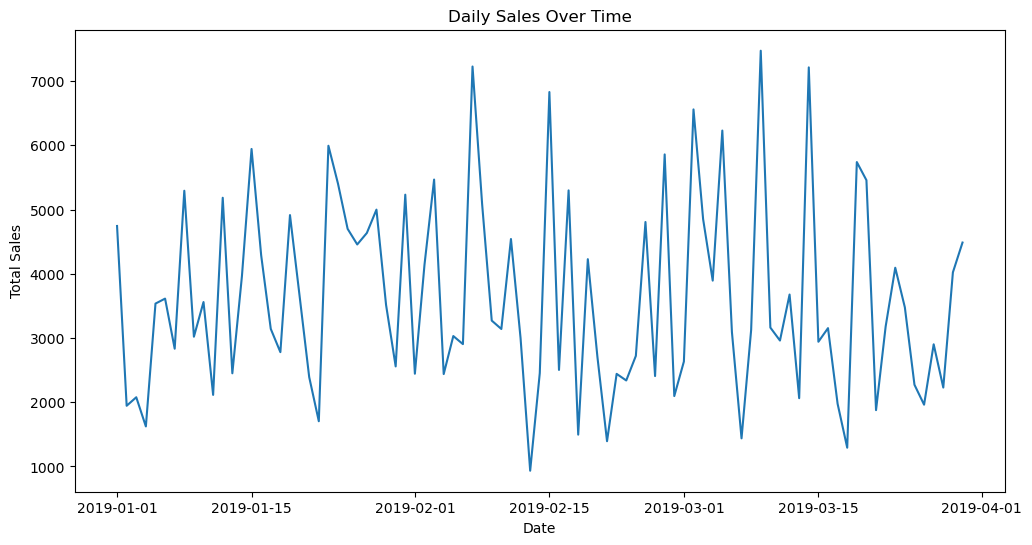

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
sales_data = pd.read_csv('supermarket_sales - Sheet1.csv')

# Convert 'Date' to datetime and set it as the index
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)

# Aggregate total sales by day
daily_sales = sales_data['Total'].resample('D').sum()

# Plot the daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

